In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tueplots import bundles

from definitions import load_users_csv, load_caracteristics_csv, load_vehicles_csv


plt.rcParams.update(bundles.neurips2021(usetex=False))

data_users = load_users_csv()
data_caracteristics = load_caracteristics_csv()

#print(data_users.head())
#print(data_users[['Num_Acc', 'grav']].head())




In [2]:
severity_by_year = pd.merge(data_users[['Num_Acc', 'grav']],
                            data_caracteristics[['Num_Acc', 'an']],
                            how="left",
                            on=['Num_Acc', 'Num_Acc'])

#print(severity_by_year.head())

res = severity_by_year[['grav', 'an']].groupby(['an']).value_counts().reset_index()
#print(severity_by_year[['grav', 'an']].groupby(['an']))

res['an'] = res['an'] + 2000

#print(res.dtype)
#print(res.shape)

#res_frame.pivot(index='an', columns='grav')
#print(res_frame)
#print(res_frame.shape)
res = res.pivot(index='an', columns='grav', values=0)

#print(res)
res = res.rename(columns={0: 'Unscathed', 10: 'Lightly Injured', 50: 'Hospitalized', 100: 'Killed'})
res.columns.name = 'Severity'



In [3]:
import pandas as pd

print(pd.__version__)

1.4.0


In [4]:
data_vehicles = load_vehicles_csv()

data_bike_users = pd.merge(data_users[['Num_Acc', 'num_veh', 'grav']],
                          data_vehicles[['Num_Acc', 'num_veh', 'catv']],
                          how='left',
                           left_on=['Num_Acc', 'num_veh'],
                           right_on=['Num_Acc', 'num_veh'])

data_bike_users = data_bike_users.loc[data_bike_users['catv'] == 1]
print(data_bike_users.head())

bike_severity_by_year = pd.merge(data_bike_users[['Num_Acc', 'grav']],
                            data_caracteristics[['Num_Acc', 'an']],
                            how="left",
                            on=['Num_Acc', 'Num_Acc'])

bike_res = bike_severity_by_year[['grav', 'an']].groupby(['an']).value_counts().reset_index()
bike_res['an'] = bike_res['an'] + 2000
bike_res = bike_res.pivot(index='an', columns='grav', values=0)
bike_res = bike_res.rename(columns={0: 'Unscathed', 10: 'Lightly Injured', 50: 'Hospitalized', 100: 'Killed'})
bike_res.columns.name = 'Severity'

          Num_Acc num_veh  grav  catv
33   201600000015     B02    50     1
34   201600000015     C03     0     1
110  201600000052     B02    50     1
145  201600000070     B02    50     1
158  201600000076     B02    50     1


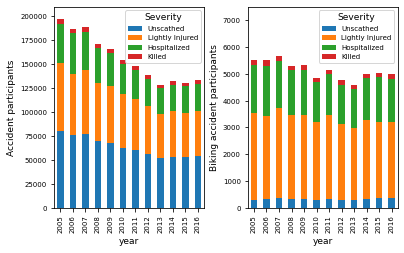

In [5]:
fig,axes = plt.subplots(nrows=1, ncols=2)

res.plot(kind='bar', stacked=True, xlabel='year', ylabel='Accident participants', ax=axes[0], ylim=[0, 210000])
bike_res.plot(kind='bar', stacked=True, xlabel='year', ylabel='Biking accident participants', ax=axes[1], ylim=[0, 7500])
plt.savefig('..//Plots//Accidents_per_year_and_severity.pdf', format='pdf')
plt.show()

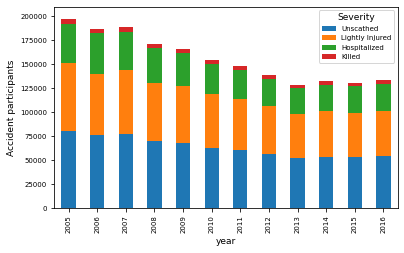

In [6]:
res.plot(kind='bar', stacked=True, xlabel='year',ylabel='Accident participants', ylim=[0, 210000])
plt.savefig('..//Plots//Accidents_per_year_and_severity_all.pdf', format='pdf')
plt.show()

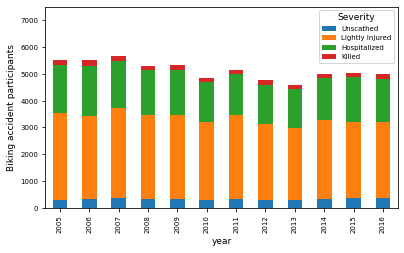

In [7]:
bike_res.plot(kind='bar', stacked=True, xlabel='year', ylabel='Biking accident participants', ylim=[0, 7500])
plt.savefig('..//Plots//Accidents_per_year_and_severity_bikes.pdf', format='pdf')
plt.show()

In [8]:
from definitions import load_places_csv

data_places = load_places_csv()


In [9]:
severity_by_road_type = pd.merge(severity_by_year[['Num_Acc', 'grav']],
                                 data_places[['Num_Acc', 'catr']],
                                 how='left',
                                 on=['Num_Acc', 'Num_Acc']
                                )

severity_by_road_type_bike = pd.merge(bike_severity_by_year[['Num_Acc', 'grav']],
                                 data_places[['Num_Acc', 'catr']],
                                 how='left',
                                 on=['Num_Acc', 'Num_Acc']
                                )

severity_by_road_type.dropna(inplace=True)
severity_by_road_type_bike.dropna(inplace=True)


def transform_catr(catr):
    if catr == 1:
        return 'Highway'
    if catr == 2:
        return 'National Road'
    if catr == 3:
        return 'Departmental Road'
    if catr == 4:
        return 'Communal Way'
    if catr == 5:
        return 'Off Public Network'
    if catr == 6:
        return 'Public Parking Lot'
    return 'Other'

severity_by_road_type['catr'] = severity_by_road_type['catr'].map(lambda catr: transform_catr(catr))
severity_by_road_type_bike['catr'] = severity_by_road_type_bike['catr'].map(lambda catr: transform_catr(catr))

severity_by_road_type_bike.head()

,Num_Acc,grav,catr
0,201600000015,50,Departmental Road
1,201600000015,0,Departmental Road
2,201600000052,50,Departmental Road
3,201600000070,50,Departmental Road
4,201600000076,50,Departmental Road


In [10]:
res_sev = severity_by_road_type[['grav', 'catr']].groupby(['catr']).value_counts().reset_index()

res_sev = res_sev.pivot(index='catr', columns='grav', values=0)

res_sev = res_sev.rename(columns={0: 'Unscathed', 10: 'Lightly Injured', 50: 'Hospitalized', 100: 'Killed'})

bike_res_sev = severity_by_road_type_bike[['grav', 'catr']].groupby(['catr']).value_counts().reset_index()

bike_res_sev = bike_res_sev.pivot(index='catr', columns='grav', values=0)

bike_res_sev = bike_res_sev.rename(columns={0: 'Unscathed', 10: 'Lightly Injured', 50: 'Hospitalized', 100: 'Killed'})




grav                Unscathed  Lightly Injured  Hospitalized    Killed
catr                                                                  
Communal Way         0.430252         0.411429      0.148847  0.009473
Departmental Road    0.368464         0.271210      0.308504  0.051823
Highway              0.434993         0.378163      0.165262  0.021583
National Road        0.396526         0.336871      0.225870  0.040733
Off Public Network   0.388698         0.342179      0.239463  0.029660
Other                0.411761         0.351637      0.220065  0.016536
Public Parking Lot   0.462144         0.316280      0.209257  0.012319
grav                Unscathed  Lightly Injured  Hospitalized    Killed
catr                                                                  
Communal Way         0.075225         0.674055      0.237406  0.013313
Departmental Road    0.036114         0.367498      0.514972  0.081416
Highway              0.150000         0.550000      0.200000  0.100000
Nation

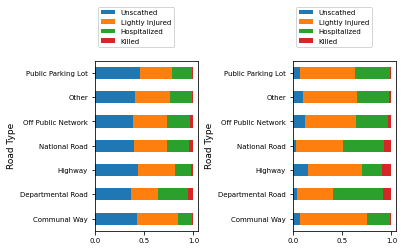

In [21]:
fig,axes = plt.subplots(nrows=1, ncols=2)



columns = ['Unscathed', 'Lightly Injured', 'Hospitalized', 'Killed']

res_sev[columns] = res_sev[columns].div(res_sev[columns].sum(axis=1), axis=0)
bike_res_sev[columns] = bike_res_sev[columns].div(bike_res_sev[columns].sum(axis=1), axis=0)

print(res_sev)
print(bike_res_sev)

res_sev.plot(kind='barh', stacked=True, xlabel='Road Type', ylabel='Accident participants', ax=axes[0], ylim=[0.0, 1.25])
bike_res_sev.plot(kind='barh', stacked=True, xlabel='Road Type', ylabel='Biking accident participants', ax=axes[1], ylim=[0.0, 1.25])

axes[0].legend(loc='center left', bbox_to_anchor=(0.0, 1.2))
axes[1].legend(loc='center left', bbox_to_anchor=(0.0, 1.2))

plt.savefig('..//Plots//Comparison_of_percentages_of_severity_by_roadtype.pdf', format='pdf')

plt.show()